In [1]:
import numpy as np
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import time
import pickle

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
npz_file = '/content/drive/MyDrive/urbansound8k_spectrograms.npz'

print(f"Loading data from {npz_file}...")
data = np.load(npz_file)

X = data['spectrograms']
y = data['labels']

print(f"Original shape: {X.shape}")
print(f"Labels shape: {y.shape}")
print(f"Number of classes: {len(np.unique(y))}")

Loading data from /content/drive/MyDrive/urbansound8k_spectrograms.npz...
Original shape: (8732, 128, 173)
Labels shape: (8732,)
Number of classes: 10


In [4]:
n_samples = X.shape[0]
X_flat = X.reshape(n_samples, -1)
X_train, X_test, y_train, y_test = train_test_split(
    X_flat, y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

print(f"Train : {X_train.shape[0]}")
print(f"Test : {X_test.shape[0]}")

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

Train : 6985
Test : 1747


In [5]:
KERNEL = 'rbf'
C = 1.0

start_time = time.time()

svm_model = SVC(
    kernel=KERNEL,
    C=C,
    gamma='scale',
    random_state=42,
    verbose=True
)

svm_model.fit(X_train_scaled, y_train)

training_time = time.time() - start_time
print(f"Training time: {training_time:.1f} s")


[LibSVM]Training time: 265.4 s


In [6]:
start_time = time.time()
y_pred = svm_model.predict(X_test_scaled)
prediction_time = time.time() - start_time
print(f"Prediction time {prediction_time:.2f} s")

Prediction time 496.02 s


In [7]:
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

print(f"Accuracy:  {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall:    {recall:.4f}")
print(f"F1-Score:  {f1:.4f}")

Accuracy:  0.7064
Precision: 0.7163
Recall:    0.7064
F1-Score:  0.7065


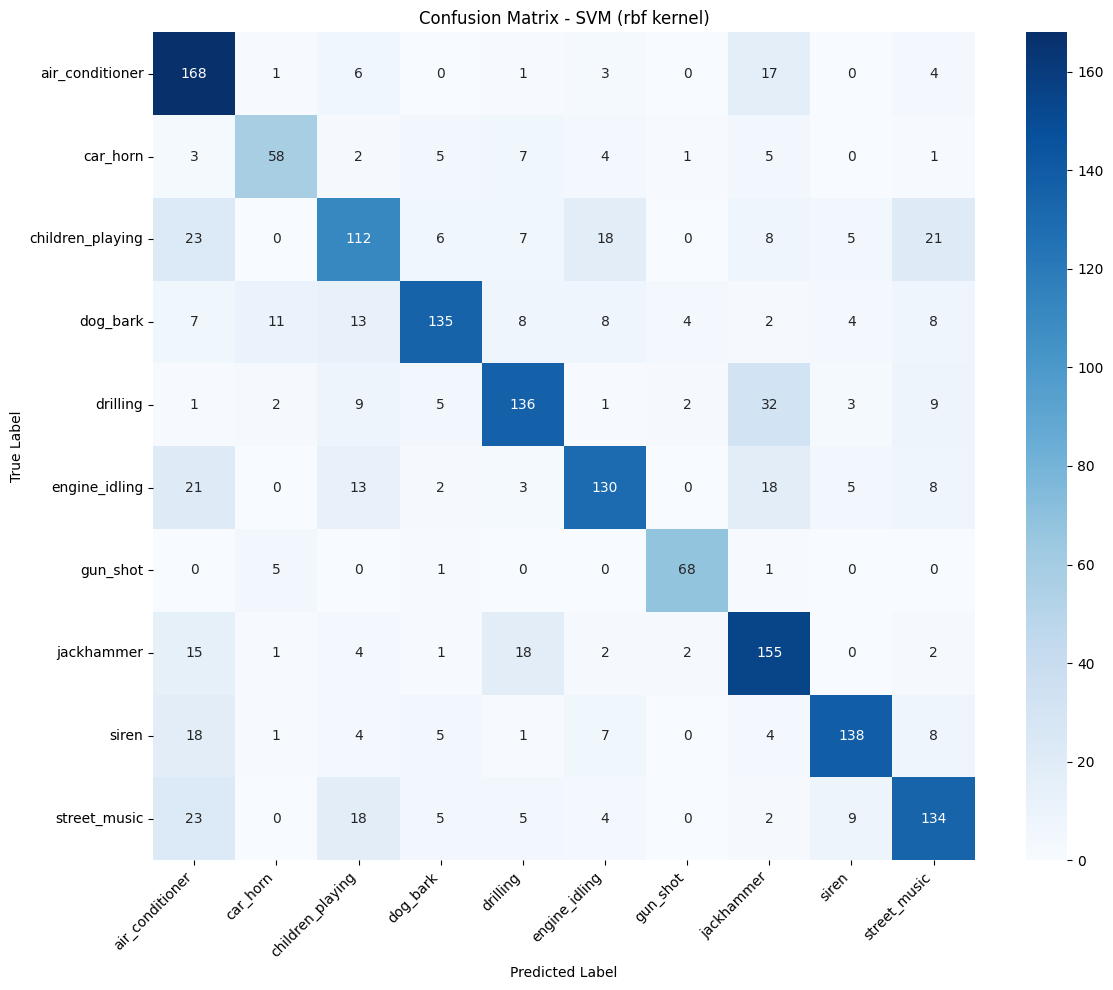

In [8]:
class_names = [
    'air_conditioner', 'car_horn', 'children_playing', 'dog_bark',
    'drilling', 'engine_idling', 'gun_shot', 'jackhammer',
    'siren', 'street_music'
]

cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(12, 10))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=class_names, yticklabels=class_names)
plt.title(f'Confusion Matrix - SVM ({KERNEL} kernel)')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()


In [9]:

print(classification_report(y_test, y_pred, target_names=class_names))

print("Per-Class Accuracies:")
for i, class_name in enumerate(class_names):
    class_mask = y_test == i
    if class_mask.sum() > 0:
        class_acc = accuracy_score(y_test[class_mask], y_pred[class_mask])
        print(f"{class_name:20s}: {class_acc:.4f} ({class_mask.sum()} samples)")


                  precision    recall  f1-score   support

 air_conditioner       0.60      0.84      0.70       200
        car_horn       0.73      0.67      0.70        86
children_playing       0.62      0.56      0.59       200
        dog_bark       0.82      0.68      0.74       200
        drilling       0.73      0.68      0.70       200
   engine_idling       0.73      0.65      0.69       200
        gun_shot       0.88      0.91      0.89        75
      jackhammer       0.64      0.78      0.70       200
           siren       0.84      0.74      0.79       186
    street_music       0.69      0.67      0.68       200

        accuracy                           0.71      1747
       macro avg       0.73      0.72      0.72      1747
    weighted avg       0.72      0.71      0.71      1747

Per-Class Accuracies:
air_conditioner     : 0.8400 (200 samples)
car_horn            : 0.6744 (86 samples)
children_playing    : 0.5600 (200 samples)
dog_bark            : 0.6750 (200 s

In [10]:
model_filename = f'svm_{KERNEL}_model.pkl'
scaler_filename = 'svm_scaler.pkl'

with open(model_filename, 'wb') as f:
    pickle.dump(svm_model, f)

with open(scaler_filename, 'wb') as f:
    pickle.dump(scaler, f)

print(f"Model saved as {model_filename}")
print(f"Scaler saved as {scaler_filename}")

metrics_dict = {
    'kernel': KERNEL,
    'C': C,
    'accuracy': float(accuracy),
    'precision': float(precision),
    'recall': float(recall),
    'f1_score': float(f1),
    'training_time': training_time,
    'prediction_time': prediction_time
}

import json
with open(f'svm_{KERNEL}_metrics.json', 'w') as f:
    json.dump(metrics_dict, f, indent=2)

Model saved as svm_rbf_model.pkl
Scaler saved as svm_scaler.pkl
